In [3]:
# Generate some fresh images

In [19]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

IMAGE_DIR = '../data/sample_chips/'

In [15]:
img = cv2.imread(r'C:\Users\604572\Desktop\Sea Lion Counting\data\sample.jpg')

In [16]:
img.shape

(3744, 5616, 3)

In [18]:
def plain_chipper(file,_chip_size=700):
    """ Rip image into smaller chips.
    """
    img_count = 1
    image_1 = cv2.imread(file)
    h, w, d = image_1.shape
    r=1.0
    width = _chip_size

    ma = cv2.cvtColor((1 * (np.sum(image_1, axis=2) > 20)).astype('uint8'), cv2.COLOR_GRAY2BGR)
    img_d = cv2.resize(image_1 * ma, (int(w * r), int(h * r)))

    h1, w1, d = img.shape

    for i in range(int(w1 // width)):
        for j in range(int(h1 // width)):
            cv2.imwrite(os.path.join('../data/sample_chips/', f'{img_count}.jpg'),
                        img_d[j * width:j * width + width, i * width:i * width + width, :])
            img_count += 1
            if img_count % 200 == 0:
                print(f'Processing chip no.', img_count)
plain_chipper(r'C:\Users\604572\Desktop\Sea Lion Counting\data\sample.jpg')

In [22]:
class PredictionConfig(Config):
    # define the name of the configuration
    NAME = "sea_lion_cfg"
    # number of classes (background + sea lion classes)
    NUM_CLASSES = 1 + 5
    # simplify GPU config
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = PredictionConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                18
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [23]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=model_dir, config=config)

# Load weights trained on MS-COCO
model.load_weights(model_dir+'mask_rcnn_sea_lion_cfg_0005.h5', by_name=True)

W1101 15:00:11.776804 29372 deprecation_wrapper.py:119] From C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1101 15:00:11.783804 29372 deprecation_wrapper.py:119] From C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1101 15:00:11.788804 29372 deprecation_wrapper.py:119] From C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1101 15:00:11.820835 29372 deprecation_wrapper.py:119] From C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please us

Processing 1 images
image                    shape: (700, 700, 3)         min:   23.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 18)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


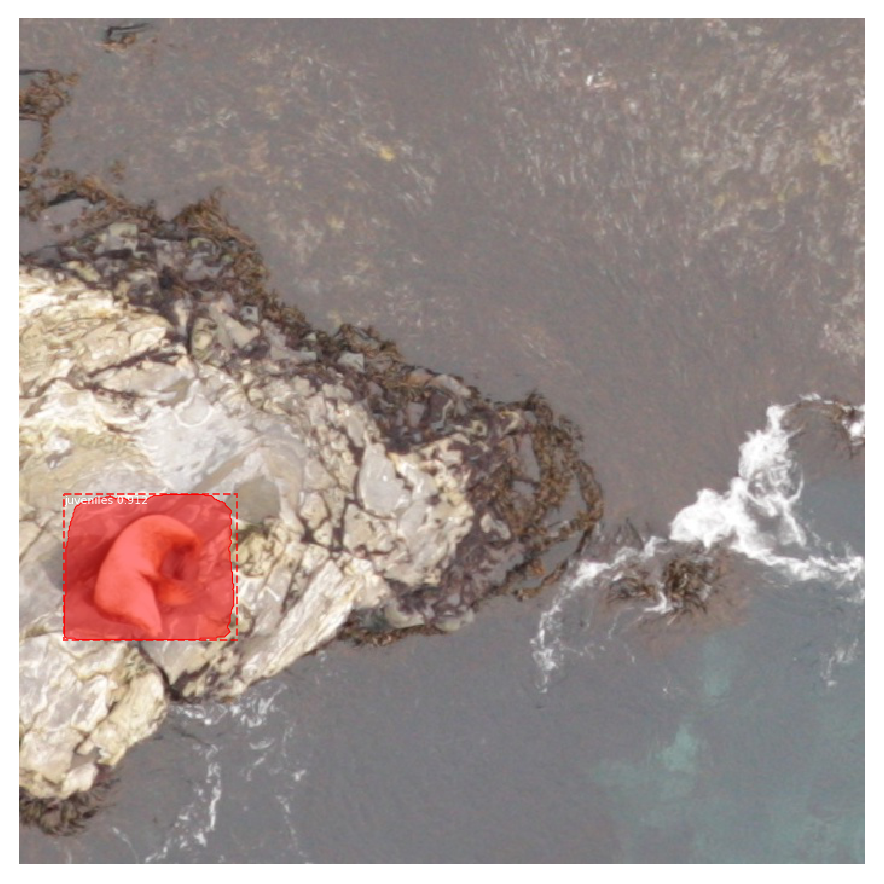

In [69]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])